# Explore Exercises I: Telco
In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.


### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [5]:
import wrangle_telco
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = wrangle_telco.wrangle_telco()

In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train, test_size = .3, random_state = 123)

In [3]:
train.head()

customer_id  monthly_charges  tenure  total_charges
361   2208-NKVVH            24.25      43        1077.95
1174  6993-YGFJV           112.55      69        7806.50
1100  6614-FHDBO           109.20      72        7878.30
579   3512-IZIKN            65.30      70        4759.75
1431  8414-OOEEL            79.50      66        5196.10

### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
import seaborn as sns
def plot_variable_pairs(df):
    sns.pairplot(df, kind = 'reg')

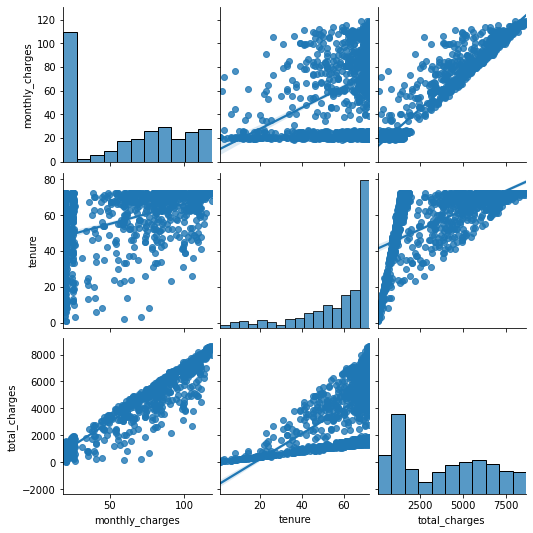

In [5]:
plot_variable_pairs(train)

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [6]:
def months_to_years(df):
    df['tenure_years'] = (df.tenure / 12).round(decimals=0).astype(int)
    return df

In [7]:
train = months_to_years(train)
train.head()

customer_id  monthly_charges  tenure  total_charges  tenure_years
361   2208-NKVVH            24.25      43        1077.95             4
1174  6993-YGFJV           112.55      69        7806.50             6
1100  6614-FHDBO           109.20      72        7878.30             6
579   3512-IZIKN            65.30      70        4759.75             6
1431  8414-OOEEL            79.50      66        5196.10             6

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [8]:
# import matplotlib
import matplotlib.pyplot as plt

# define function, arguments are dataframe and two lists of columns.
def plot_categorical_and_continuous_vars(df, continuous, categorical):
    '''
    Takes in a dataframe, a list of continuous variables, and a list of categorical 
    variables of the dataframe as arguments. Creates three different plots of each
    categorical pair.
    '''
    # loop through each column in the first list
    for con in continuous:
        # loop through each column in the second list, creating a loop for each categorical pair
        for cat in categorical:
            # each loop returns three subplots in a figure. Plots a swarmplot, stripplot, and boxplot.
            plt.figure(figsize = (20,10))
            plt.subplot(1,3,1)
            sns.swarmplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,2)
            sns.stripplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,3)
            sns.boxplot(x=df[cat], y=df[con], data=df)

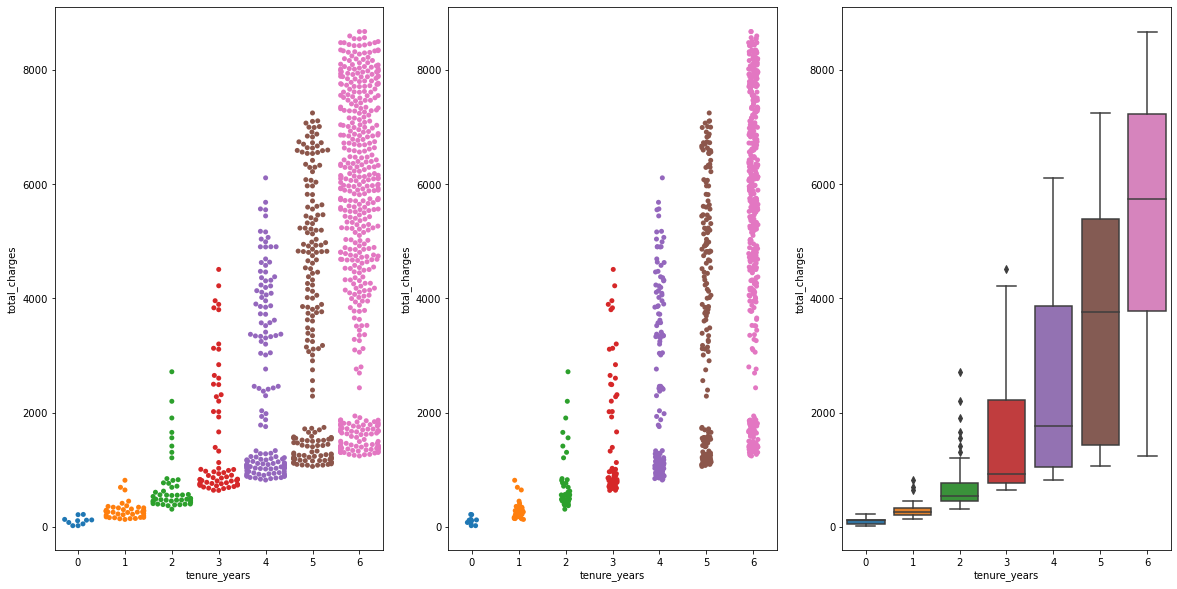

In [9]:
telco_cat = ['tenure_years']
telco_con = ['total_charges']

plot_categorical_and_continuous_vars(train, telco_con, telco_cat)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

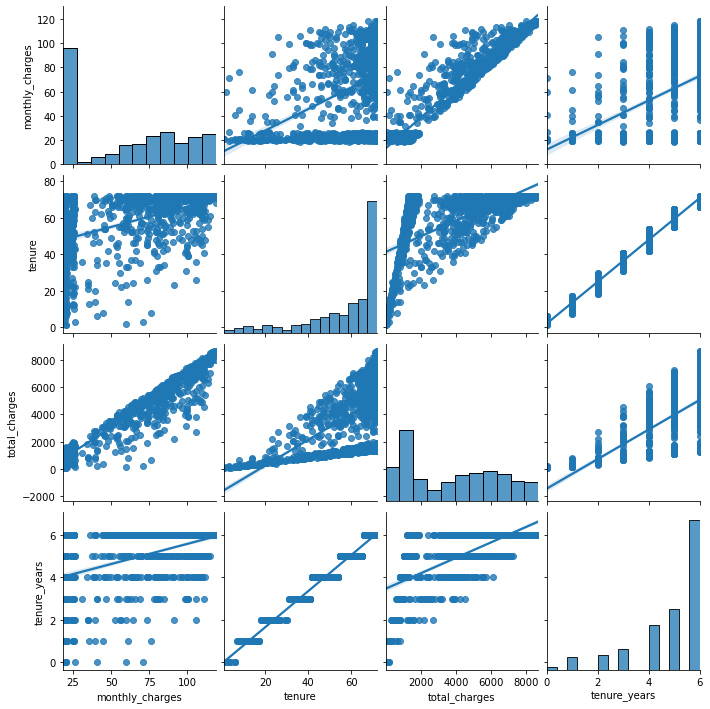

In [10]:
import explore

# 2:
explore.plot_variable_pairs(train)

In [11]:
### Number 3 concerns the telco dataset and I did not add it to my module 
### so I can keep that module focused on general datasets

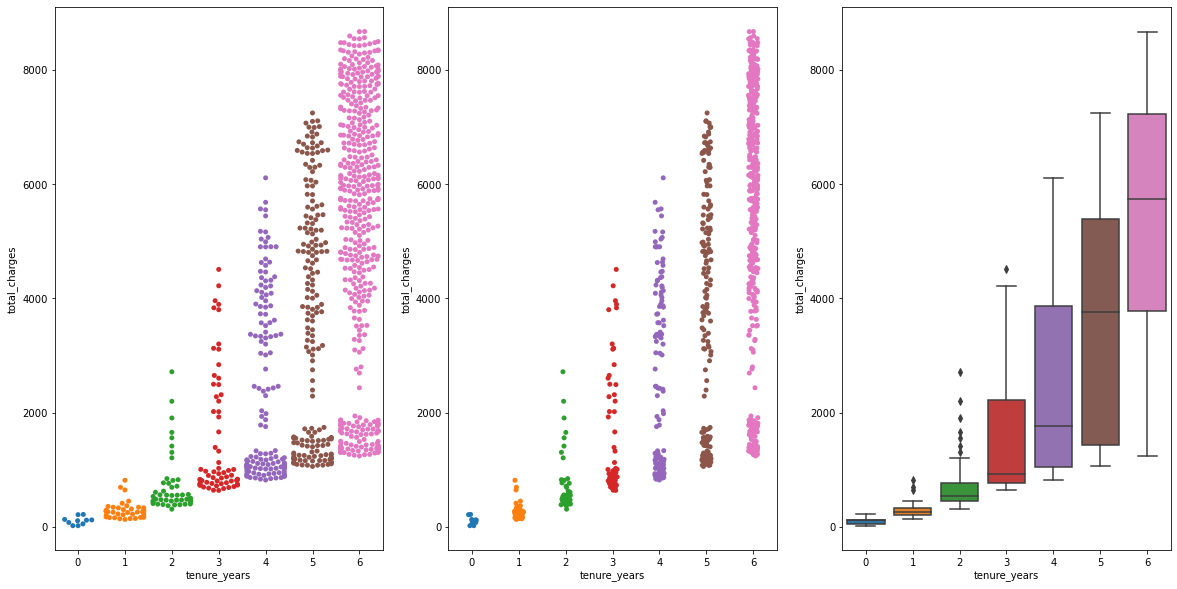

In [12]:
# 4:
explore.plot_categorical_and_continuous_vars(train, telco_con, telco_cat)

### 6. Explore your dataset with any other visualizations you think will be helpful.

I will perform this exercise on the zillow data

### 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

This will be completed in mall_customers.ipynb


# Explore Exercises II: Zillow



### 1. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [1]:
from wrangle import wrangle_zillow

train, validate, test = wrangle_zillow()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
train.head()

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
1462930           3            2                          1385   
1842132           4            2                          1567   
869730            4            2                          1910   
1306111           3            2                          2042   
431629            3            2                          1502   

         taxvaluedollarcnt  yearbuilt  taxamount  fips  
1462930             123859       1956    1553.44  6059  
1842132             251569       1946    3074.99  6037  
869730              762153       1958    8578.06  6059  
1306111             751716       1936    9122.39  6037  
431629              351732       1956    4343.63  6037

### 3. Visualize all combinations of variables in some way.



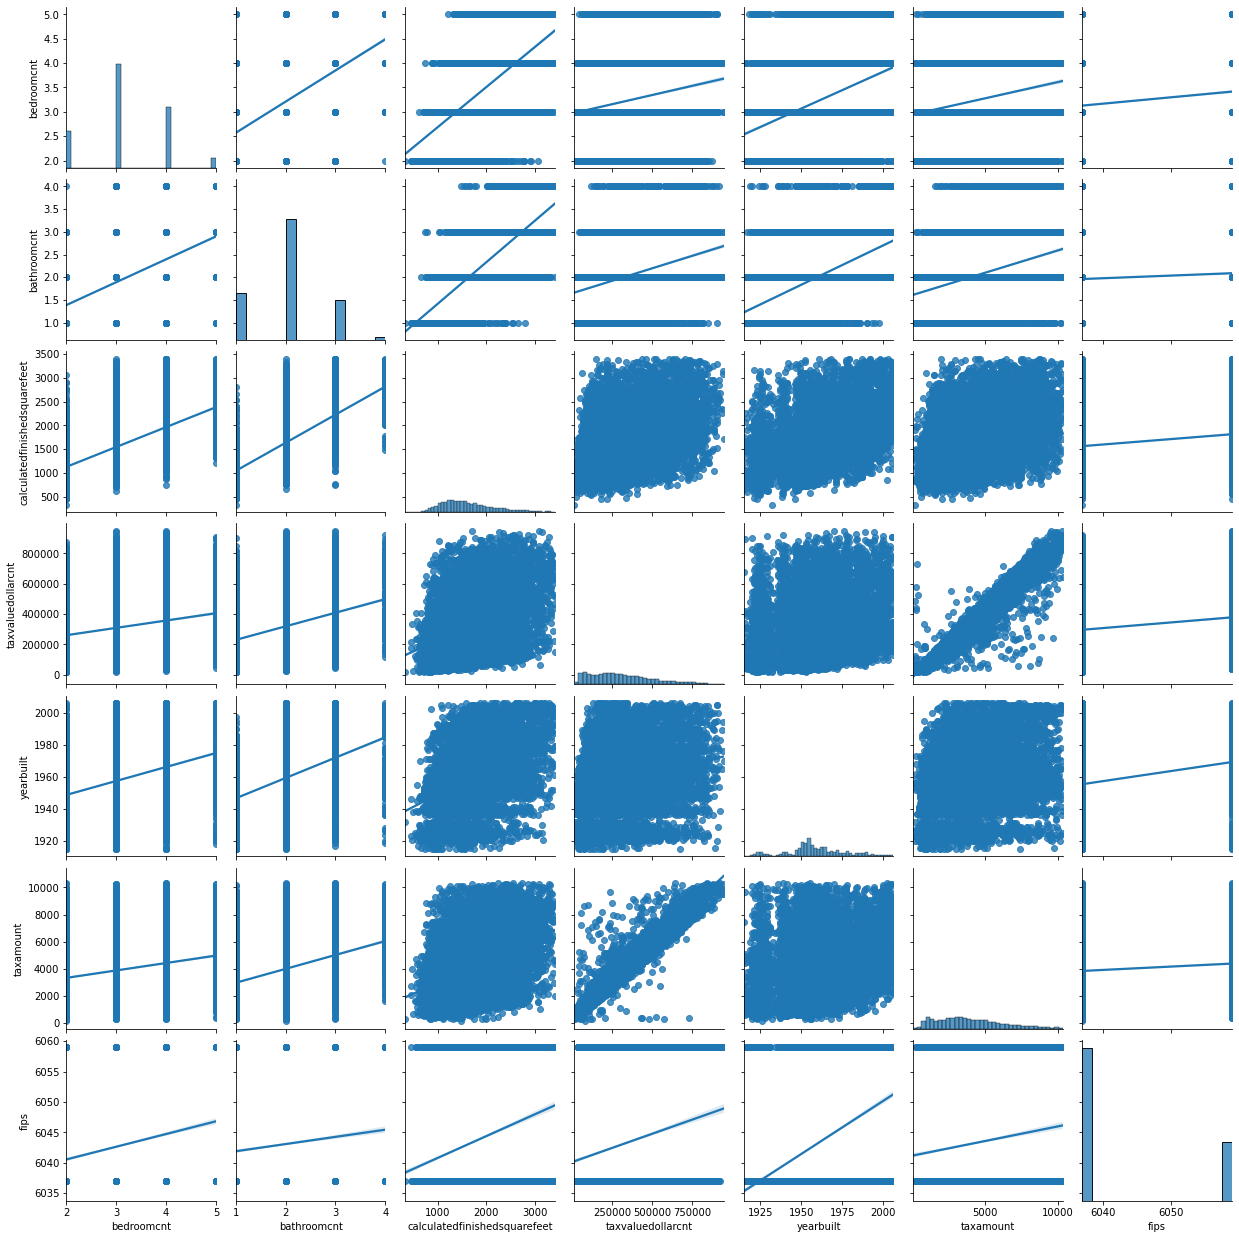

In [15]:
explore.plot_variable_pairs(train.sample(10_000))

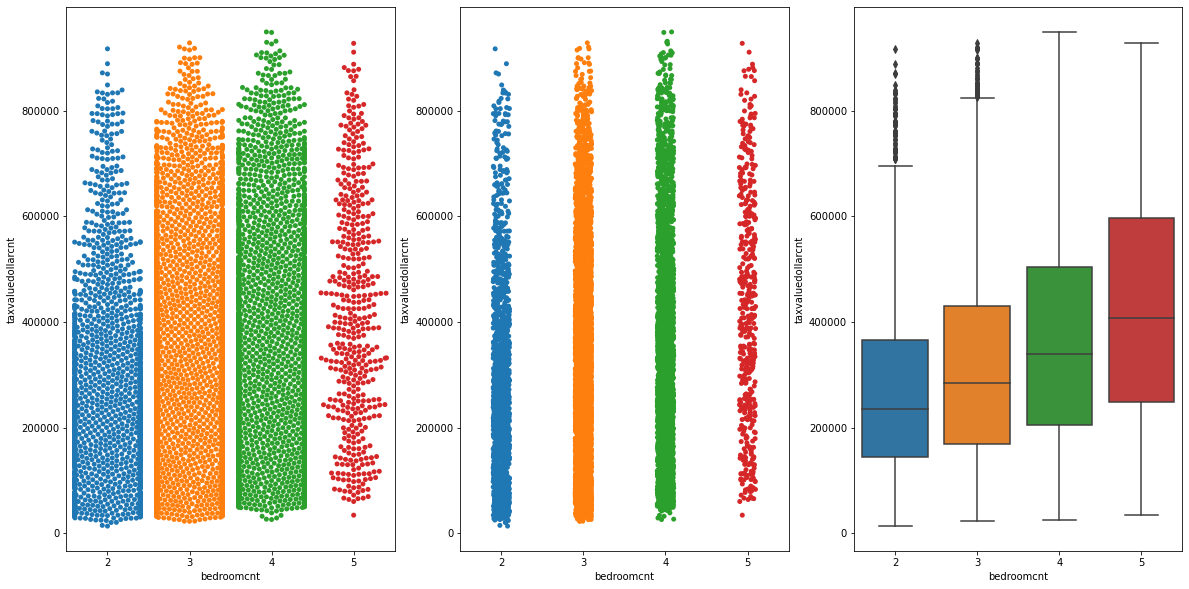

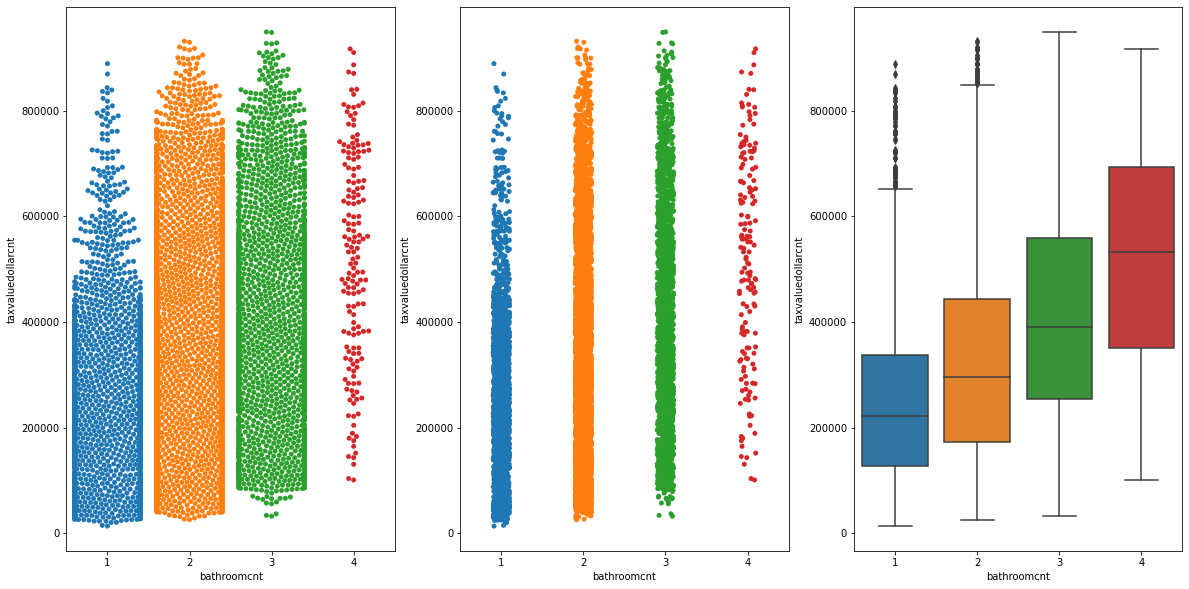

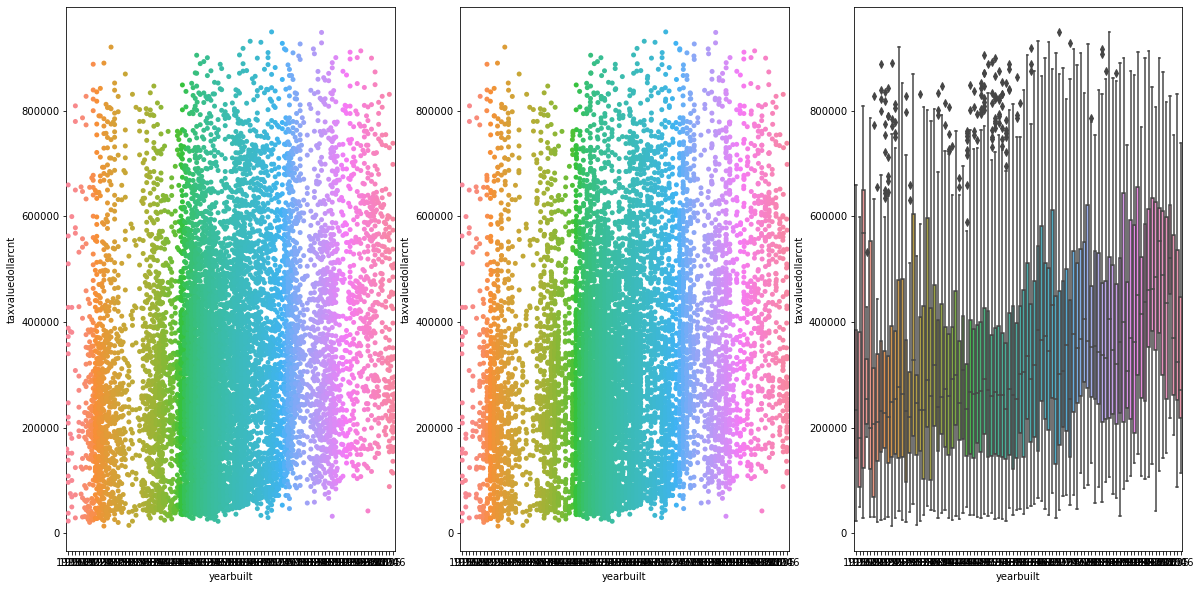

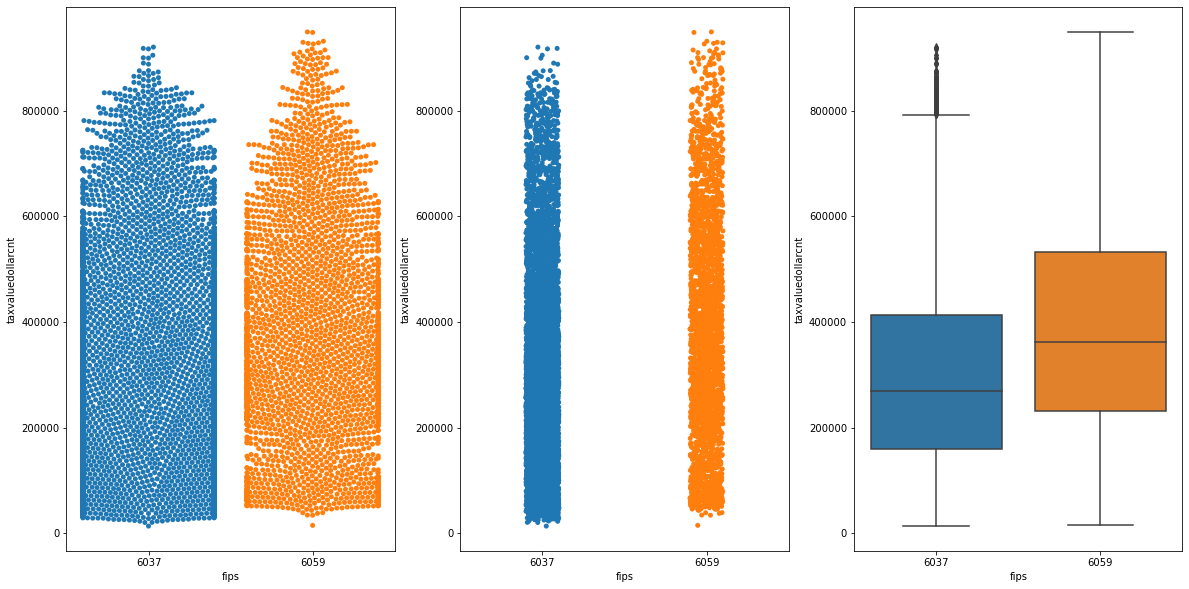

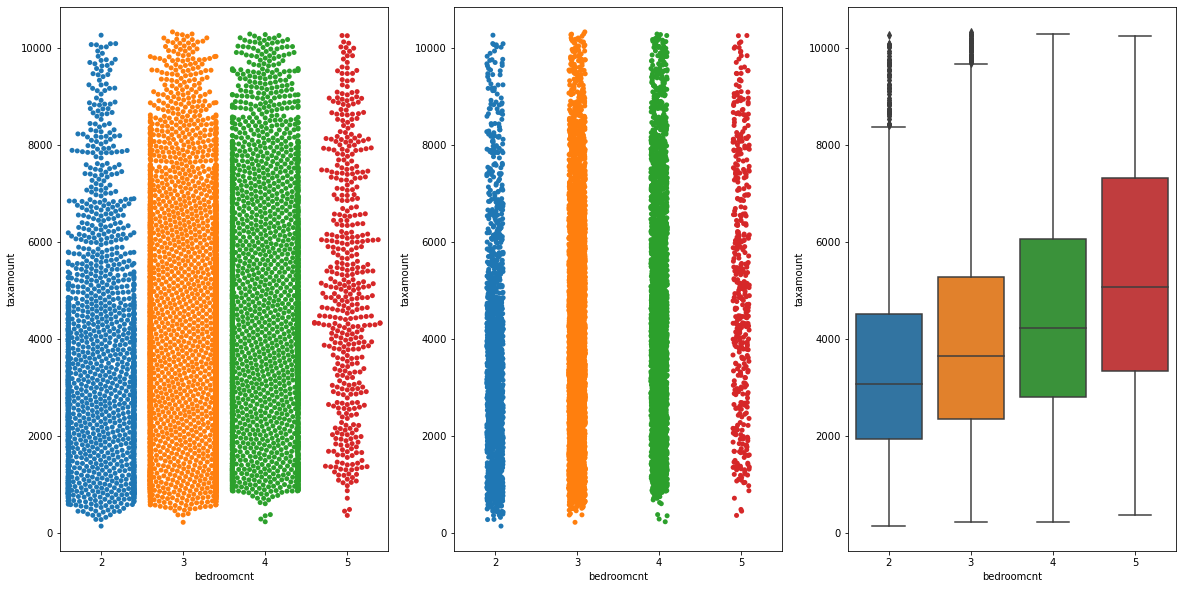

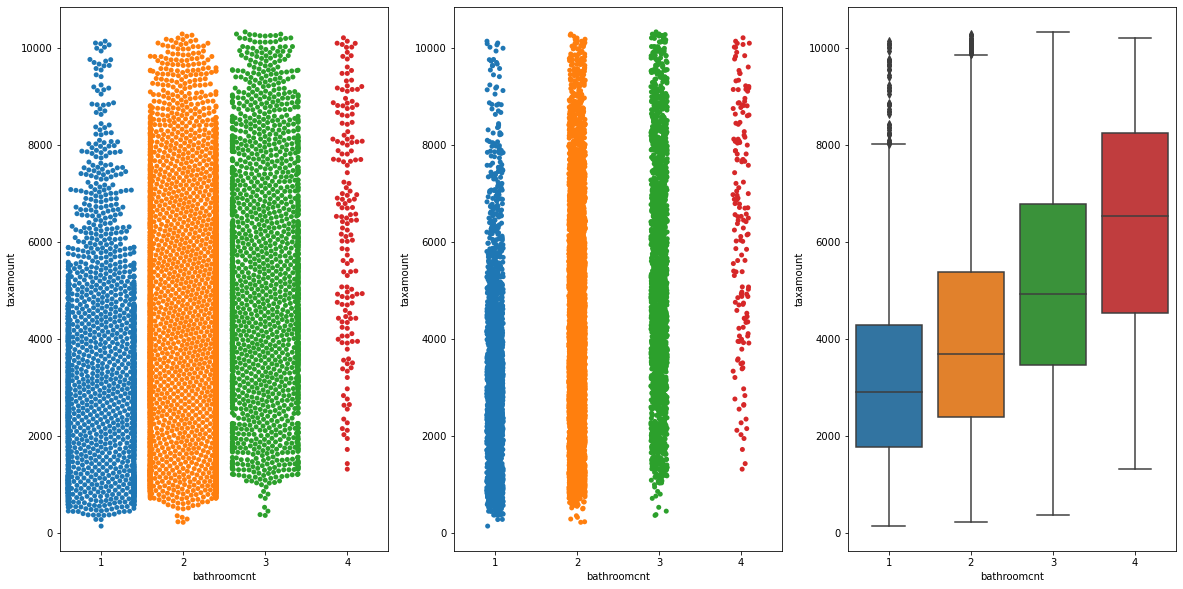

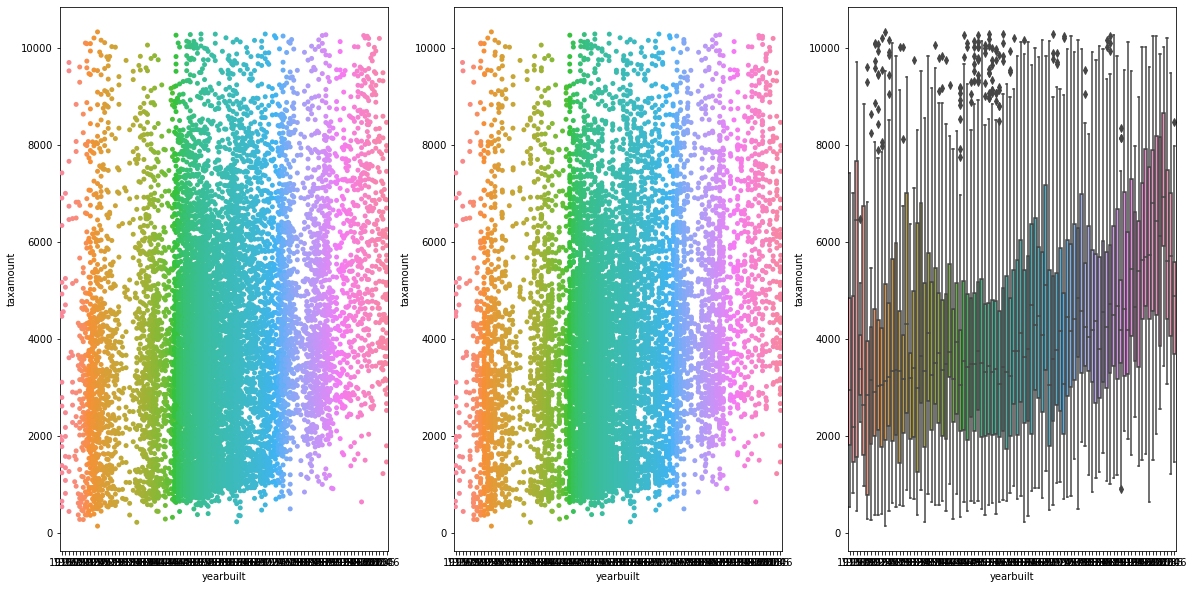

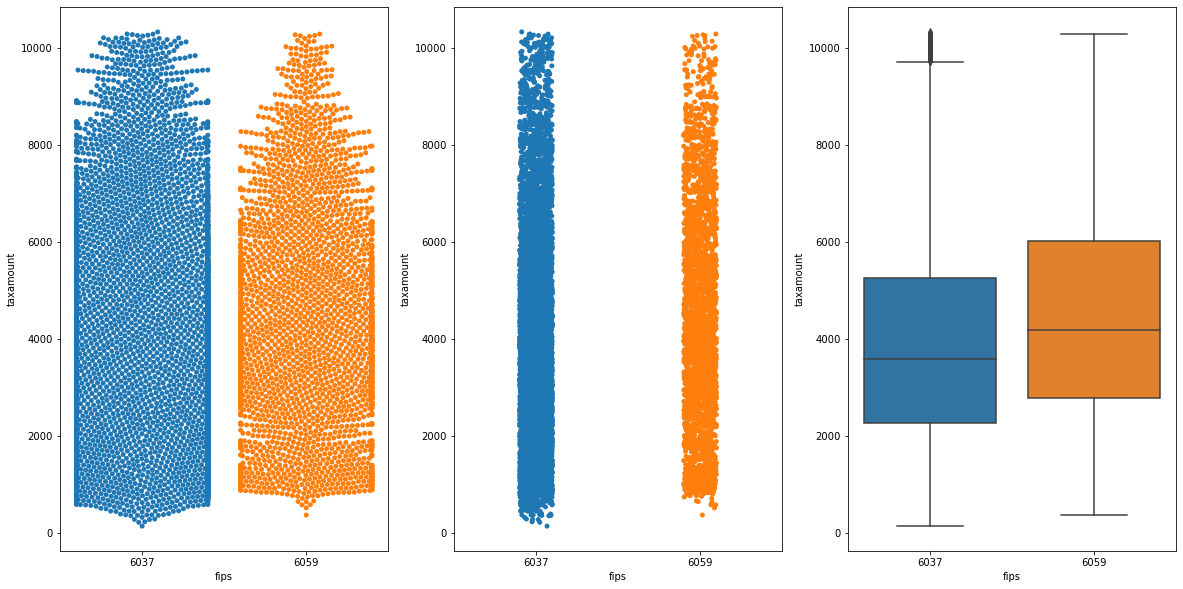

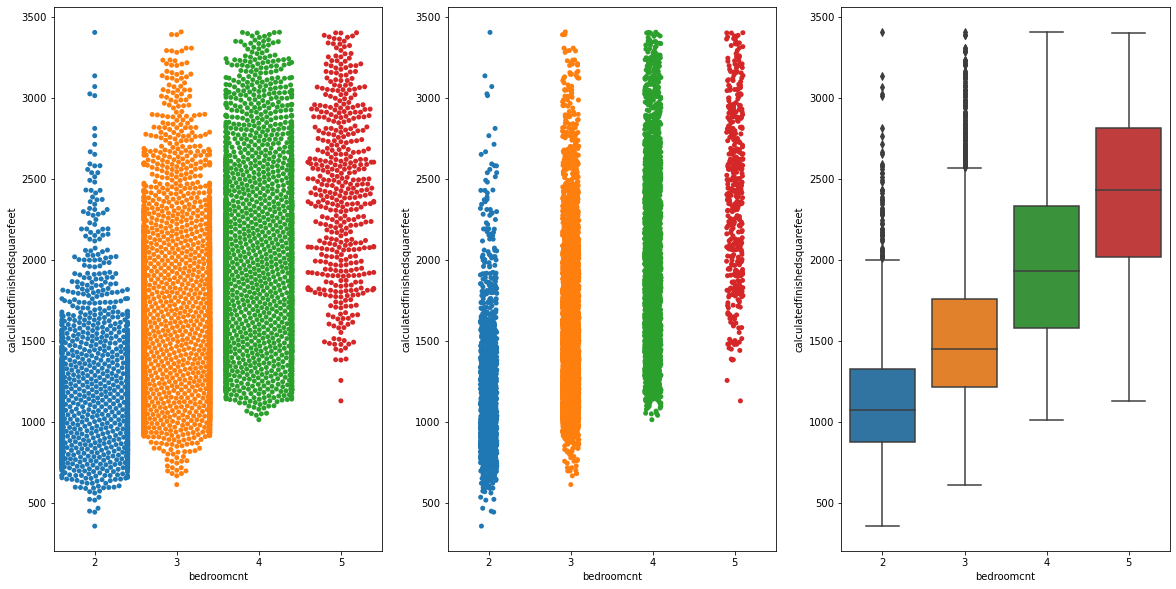

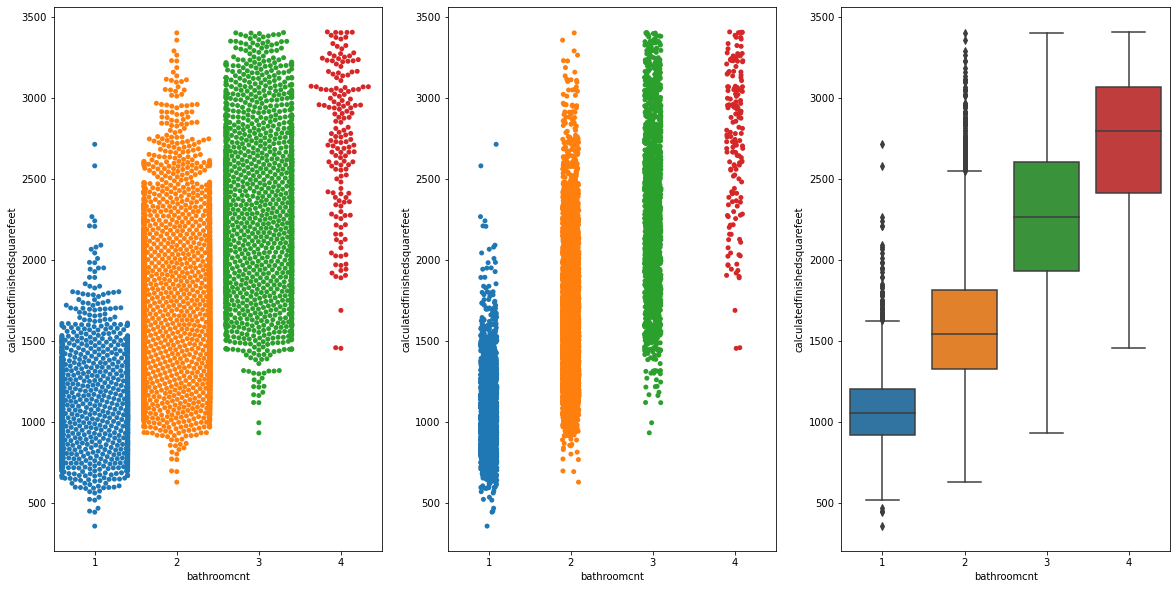

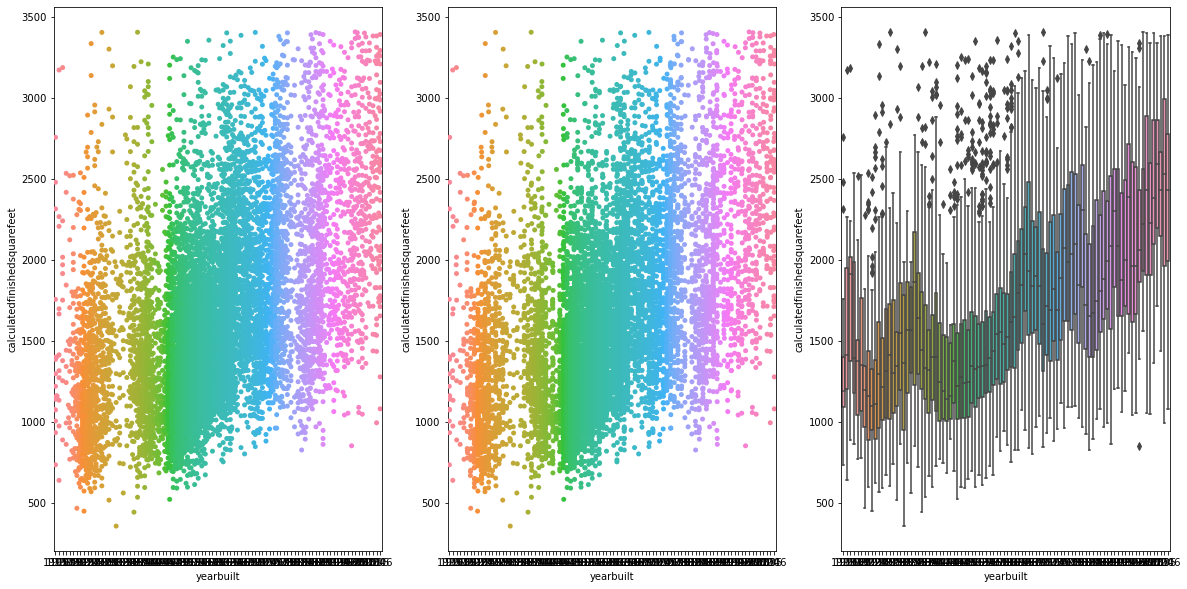

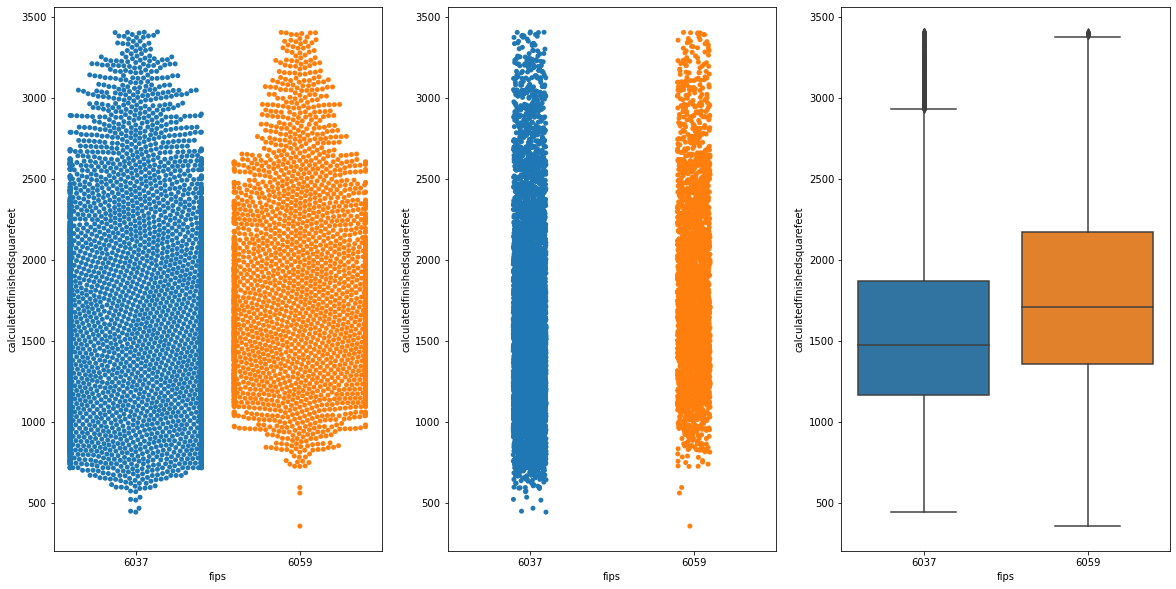

In [16]:
zillow_con = ['taxvaluedollarcnt','taxamount','calculatedfinishedsquarefeet']
zillow_cat= ['bedroomcnt','bathroomcnt','yearbuilt','fips']

explore.plot_categorical_and_continuous_vars(train.sample(10_000), zillow_con, zillow_cat)

### 2. Come up with some initial hypotheses based on your goal of predicting property value.




### 4. Run the appropriate statistical tests where needed.



In [41]:
from scipy import stats
alpha = 0.5
stats_tests = train.sample(100_000)

bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
1333497           4            2                          1945   
2115651           3            2                          1861   
1871953           3            2                          1677   
1091522           2            1                          1020   
859262            3            2                          1077   

         taxvaluedollarcnt  yearbuilt  taxamount  fips  
1333497              89204       1969    1521.46  6059  
2115651              65626       1964    1409.59  6037  
1871953             132299       1989    2002.06  6059  
1091522             117724       1947    1768.61  6037  
859262              261696       1953    3139.62  6059

$H_0$: There is no association between sq ft and value

$H_a$: There is an association between sq ft and value

Categorical and continuous = chi2

In [42]:
# crosstab sq ft and value

observe = pd.crosstab(stats_tests.calculatedfinishedsquarefeet, stats_tests.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observe)

In [43]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---
Expected

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---

chi^2 = 205119042.4872
p     = 0.0000


In [44]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.



$H_0$: There is no association between bedroom count and value

$H_a$: There is an association between bedroom count and value


Categorical and continuous = chi2

In [45]:
# crosstab bedrooms and value

observe = pd.crosstab(stats_tests.bedroomcnt, stats_tests.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observe)

In [46]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 1 1 ... 1 0 0]
 [1 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
---
Expected

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---

chi^2 = 213760.7781
p     = 0.0000


In [47]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.



$H_0$: There is no association between bathroom count and value

$H_a$: There is an association between bathroom count and value


Categorical and continuous = chi2

In [48]:
# crosstab bedrooms and value

observe = pd.crosstab(stats_tests.bathroomcnt, stats_tests.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observe)

In [49]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 3]
 [0 0 0 ... 0 0 0]]
---
Expected

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---

chi^2 = 229201.9436
p     = 0.0000


In [50]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


$H_0$: There is no association between year built and value

$H_a$: There is an association between year built and value

Categorical and continuous = chi2

In [51]:
observe = pd.crosstab(stats_tests.yearbuilt, stats_tests.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observe)

In [52]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---
Expected

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
---

chi^2 = 6237762.8794
p     = 0.0000


In [53]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


$H_0$: There is no association between FIPS and value

$H_a$: There is an association between FIPS and value

Categorical and continuous = chi2

In [54]:
observe = pd.crosstab(stats_tests.fips, stats_tests.taxvaluedollarcnt)

chi2, p, degf, expected = stats.chi2_contingency(observe)

In [55]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1 1 1 ... 1 0 0]
 [0 0 0 ... 0 1 3]]
---
Expected

[[0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]]
---

chi^2 = 86880.5950
p     = 0.0000


In [56]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


### 5. What independent variables are correlated with the dependent variable, home value?

- Square footage
- Bedroom Count
- Bathroom Count
- Year Built
- FIPS

### 6. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?



### 7. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- There is a general upward trend in taxvaluedollarcnt as bedrooms, bathrooms, sqft, and year go up.
- Chi2 tests reveal correlation between sqft, bed, bath, year, fips (independent variables) and the taxvaluedollarcnts